In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import sici as sici
%matplotlib inline

$$T_\chi(\theta)=\frac{6}{\theta^2}\left[\ln(\theta)+\gamma_E-\frac{1}{2}-Ci(\theta)+\frac{1}{2}j_0(\theta)\right]$$

In [2]:
def T_chi(theta):
    if theta == 0:
        return T_chi(0.000001)
    gamma_e = 0.57721566490153286060651
    return 6.0 * (math.log(theta) + gamma_e - 0.5 - sici(theta)[1] + 0.5 * math.sin(theta) / theta) / theta**2

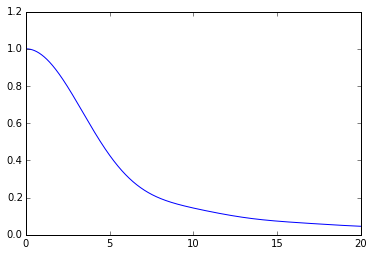

In [3]:
theta = np.arange(0, 20., 0.001)
T = np.array([T_chi(t) for t in theta])
plt.plot(theta, T)

$$W_\mathrm{TH}(x)=3x^{-3}(\sin(x)-x\cos(x))$$

In [4]:
def w_th(x):
    if x == 0:
        return w_th(0.000001)
    return 3. * (math.sin(x) - x * math.cos(x)) / (x**3)

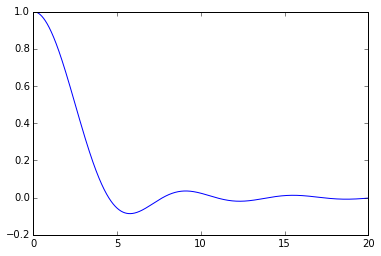

In [5]:
x = np.arange(0, 20., 0.001)
w = np.array([w_th(t) for t in x])
plt.plot(x, w)

$$\sigma^2(R)/P_R(k_R)=\frac{1}{9}\int_0^\infty x^3W_\mathrm{TH}^2(x)T_\chi^2(x/\sqrt{3})x^{n_R-1}\,dx$$

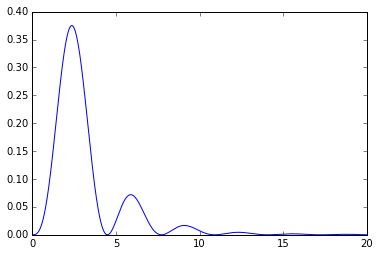

In [6]:
dx = 0.01
x_max = 20.
n_R = 1.
x = np.arange(dx, x_max, dx)
factor = np.array([1. / 9. * t**3 * w_th(t)**2 * T_chi(t / math.sqrt(3))**2 for t in x])
y = factor * pow(x, n_R - 1.)
plt.plot(x, y)

In [7]:
sigma2 = y.sum() * dx
print sigma2

0.905623836915


In [8]:
join = np.zeros((len(x), 2))
join[:, 0] = x
join[:, 1] = factor
np.savetxt('ucmh_int_factor.txt', join, delimiter=' ')